In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import itertools as it

# Ejercicio I.1

### El número de crías por camada en una granja porcina para un periodo dado arroja los siguientes resultados: 4, 7, 2, 8, 6, 7, 2, 2, 9, 5, 5, 4, 5, 2, 6, 4, 7, 8, 4, 8. Se pide caracterizar esta distribución de valores de la forma más detallada posible.

### a) *Distribución de frecuencias*

Se construye una lista con los datos que proporciona el enunciado:

In [36]:
crias = [4, 7, 2, 8, 6, 7, 2, 2, 9, 5, 5, 4, 5, 2, 6, 4, 7, 8, 4, 8]

Y se convierte en una matriz de NumPy:

In [37]:
crias = np.array(crias)
crias

array([4, 7, 2, 8, 6, 7, 2, 2, 9, 5, 5, 4, 5, 2, 6, 4, 7, 8, 4, 8])

A partir de él se determina el número de **observaciones** ($n$):

In [38]:
n = crias.size
n

20

Y los **valores** ($x_{i}$):

In [39]:
xi = np.unique(crias)
xi

array([2, 4, 5, 6, 7, 8, 9])

A partir de esta matriz de valores únicos se construye un marco de datos de Pandas, inicialmente con una única columna, que servirá de base para la tabla de frecuencias:

In [40]:
tablaFrec = pd.DataFrame(xi, columns = ["xi"])
tablaFrec

,xi
0,2
1,4
2,5
3,6
4,7
5,8
6,9


Se determinan las **frecuencias absolutas** ($n_{i}$):

In [41]:
tabla = pd.crosstab(index = crias, columns = "ni") #Genera las frecuencias absolutas para cada valor
ni = tabla.values #Toma únicamente las frecuencias absolutas

tablaFrec["ni"] = ni #Y las incorpora en forma de columna al marco de datos

Las **frecuencias absolutas acumuladas** ($N_{i}$):

In [42]:
Ni = np.cumsum(ni)

tablaFrec["Ni"] = Ni

Las **frecuencias relativas** ($f_{i}$):

In [43]:
fi = ni/n

tablaFrec["fi"] = fi

Y, finalmente, las **frecuencias relativas acumuladas** ($F_{i}$):

In [44]:
Fi = np.cumsum(fi)

tablaFrec["Fi"] = Fi
tablaFrec

,xi,ni,Ni,fi,Fi
0,2,4,4,0.20,0.20
1,4,4,8,0.20,0.40
2,5,3,11,0.15,0.55
3,6,2,13,0.10,0.65
4,7,3,16,0.15,0.80
5,8,3,19,0.15,0.95
6,9,1,20,0.05,1.00


Se representan las frecuencias absolutas y relativas en sendos diagramas de barras gracias a PyPlot:

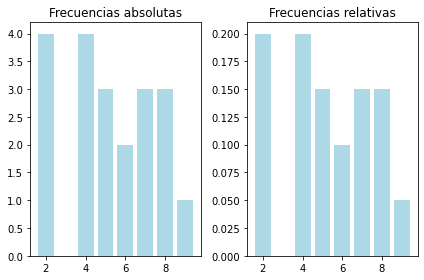

In [45]:
plt.subplot(1, 2, 1) #Dispone los gráficos (aquí se hace referencia al primero) en una fila y dos columnas

plt.bar(tablaFrec["xi"], tablaFrec["ni"], color = "lightblue")
plt.title("Frecuencias absolutas")

plt.subplot(1, 2, 2) #Segundo gráfico

plt.bar(tablaFrec["xi"], tablaFrec["fi"], color = "lightblue")
plt.title("Frecuencias relativas")

plt.tight_layout() #Evita que se solapen ambos gráficos

### b) *Medidas centrales*

La **media aritmética** ($\bar{x}$):

In [46]:
media = np.mean(crias)
media

5.25

La **mediana** ($Me$):

In [47]:
mediana = np.median(crias)
mediana

5.0

Para determinar la **moda** ($Mo$), se hace uso de Statistics:

In [48]:
moda = st.mode(crias)
moda

4

Si bien el 2 también podría ser la moda puesto que su frecuencia absoluta es igual a la del 4.

### c) *Medidas de posición*

En primer lugar, se ordena la matriz, a modo de referencia:

In [49]:
criasOrd = np.sort(crias)
criasOrd

array([2, 2, 2, 2, 4, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 8, 9])

Se calculan el tercer **cuartil** ($Q_{3}$), el **percentil** veinte ($P_{20}$) y el quinto **decil** ($D_{5}$), que equivale a la mediana; se usa el método de interpolación *higher*, que toma el mayor de ambos valores cuando el cuantil se haya entremedias:

In [50]:
Q3 = np.quantile(crias, 0.75, interpolation = "higher")
Q3

7

In [51]:
P20 = np.quantile(crias, 0.20, interpolation = "higher")
P20

4

Con el método *midpoint* se obtiene el mismo resultado que a mano y en R:

In [52]:
P20 = np.quantile(crias, 0.20, interpolation = "midpoint")
P20

3.0

In [53]:
D5 = np.quantile(crias, 0.50, interpolation = "higher")
D5

5

### d) *Medidas de dispersión*

La **varianza** ($S^{2}$):

In [54]:
var = np.var(crias)
var

4.7875

La **desviación típica** ($S$):

In [55]:
DT = np.std(crias)
DT

2.1880356487041066

El **rango** ($R$):

In [56]:
rango = max(crias) - min(crias)
rango

7

El **rango intercuartílico** ($R_{I}$):

In [57]:
rangoInt = np.quantile(crias, 0.75, interpolation = "higher") - np.quantile(crias, 0.25, interpolation = "higher")
rangoInt

3

El **coeficiente de variación** ($CV$):

In [58]:
CV = DT/media
CV

0.4167686949912584

### e) *Agrupación por intervalos*

En primer lugar, se determina el número de **intervalos**:

In [59]:
k = np.ceil(np.sqrt(n)).astype(int)
k

5

Y su amplitud:

In [60]:
A = rango/k
A

1.4

Conviene redondear también este valor hacia arriba para evitar que los valores de la distribución se solapen con los extremos de los intervalos:

In [61]:
A = 1.5

Se establece el extremo inferior del primer intervalo ($L_{1}$) como el valor mínimo de la distribución menos la mitad de la precisión, que en este caso está en las décimas:

In [62]:
f = 1/2 * 0.1

L1 = min(crias) - f
L1

1.95

Se crea una lista con todos los **extremos de los intervalos** ($L_{i}$) haciendo uso de Itertools:

In [63]:
Li = it.count(start = L1, step = A)

L = [next(Li) for extremo in range(k + 1)]
L

[1.95, 3.45, 4.95, 6.45, 7.95, 9.45]

La primera marca de clase ($x_{1}$) se puede calcular como el punto medio entre $L_{1}$ y $L_{2}$:

In [64]:
x1 = (L[0] + L[1])/2
x1

2.7

Y de manera análoga a como se hizo con los extremos, se obtienen todas las **marcas de clase** ($x_{i}$):

In [65]:
xi = it.count(start = x1, step = A)

x = [next(xi) for marca in range(k)]
x

[2.7, 4.2, 5.7, 7.2, 8.7]

Para agrupar en intervalos la distribución:

In [66]:
criasInt = pd.cut(
                    crias, 
                    bins = L, #Puntos de corte 
                    right = False #Intervalos cerrados por la izquierda
                 ) 
criasInt

[[3.45, 4.95), [6.45, 7.95), [1.95, 3.45), [7.95, 9.45), [4.95, 6.45), ..., [3.45, 4.95), [6.45, 7.95), [7.95, 9.45), [3.45, 4.95), [7.95, 9.45)]
Length: 20
Categories (5, interval[float64, left]): [[1.95, 3.45) < [3.45, 4.95) < [4.95, 6.45) < [6.45, 7.95) < [7.95, 9.45)]

Se reproduce el proceso del primer apartado para generar la tabla de frecuencias:

In [67]:
#Intervalos
intervalos = np.unique(criasInt)
tablaFrecInt = pd.DataFrame(intervalos, columns = ["[Li, Li+1)"])

#Marcas de clase
tablaFrecInt["xi"] = x

#Frecuencias absolutas
tabla = pd.crosstab(index = criasInt, columns = "ni")
ni = tabla.values
tablaFrecInt["ni"] = ni

#Frecuencias absolutas acumuladas
Ni = np.cumsum(ni)
tablaFrecInt["Ni"] = Ni

#Frecuencias relativas
fi = ni/n
tablaFrecInt["fi"] = fi

#Frecuencias relativas acumuladas
Fi = np.cumsum(fi)
tablaFrecInt["Fi"] = Fi

#Tabla de frecuencias agrupada por intervalos
tablaFrecInt

,"[Li, Li+1)",xi,ni,Ni,fi,Fi
0,"[1.95, 3.45)",2.7,4,4,0.20,0.20
1,"[3.45, 4.95)",4.2,4,8,0.20,0.40
2,"[4.95, 6.45)",5.7,5,13,0.25,0.65
3,"[6.45, 7.95)",7.2,3,16,0.15,0.80
4,"[7.95, 9.45)",8.7,4,20,0.20,1.00


Para las representación de las frecuencias se recurre a sendos histogramas:

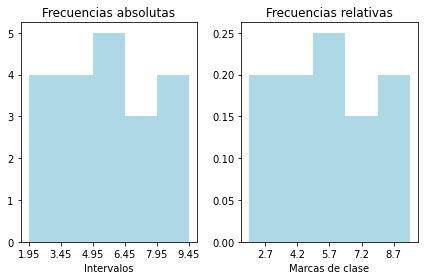

In [68]:
plt.subplot(1, 2, 1) #Dispone los gráficos (aquí se hace referencia al primero) en una fila y dos columnas

plt.hist(
            crias, 
            bins = L,
            facecolor = "lightblue"
        )
plt.title("Frecuencias absolutas")
plt.xticks(L)
plt.xlabel("Intervalos")

plt.subplot(1, 2, 2) #Segundo gráfico

plt.hist(
            crias, 
            bins = L,
            weights = np.ones_like(crias)/crias.size, #Pesos para representar las frecuencias relativas
            facecolor = "lightblue"
        )
plt.title("Frecuencias relativas")
plt.xticks(x)
plt.xlabel("Marcas de clase")

plt.tight_layout() #Evita que se solapen ambos gráficos